In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [43]:
# df = pd.concat([pd.read_csv('../data/luciferase_results_4_12_22.csv'), pd.read_csv('../data/luciferase_results_4_12_22.csv')])
df = pd.read_csv('../data/luciferase-assay/luciferase_results_5_27_22.csv')
df['replicate'] = df['condition'].apply(lambda x: x.split(' ')[-1].strip('rep'))
df['condition'] = df['condition'].apply(lambda x: x.split(',')[0].strip())
for i in range(1, 6):
    df['condition'] = df['condition'].apply(lambda x: x.strip(f'rep{i}').strip())
# df = df.loc[~(((df.replicate == '4') | (df.replicate == '1')) & (df.condition == 'ZFP809'))]
print(df)


   well    condition  firefly luminescence  renilla luminescence  \
0    G1   uninjected                 87.28                 97.55   
1    G2   uninjected                127.10                145.00   
2    G3   uninjected                133.50                147.90   
3    G4   uninjected                240.80                150.90   
4    G5   uninjected                174.00                109.00   
5    G6       cDNA3.               4079.00               5080.00   
6    G7       cDNA3.               2404.00               3724.00   
7    G8       cDNA3.               8032.00               6316.00   
8    G9       cDNA3.               3219.00               4909.00   
9   G10       cDNA3.              13590.00               5003.00   
10  G11  FiNZ-zpf809               1551.00               1805.00   
11  G12  FiNZ-zpf809                629.20               2608.00   
12   H1  FiNZ-zpf809               4205.00               3017.00   
13   H2  FiNZ-zpf809               2940.00      

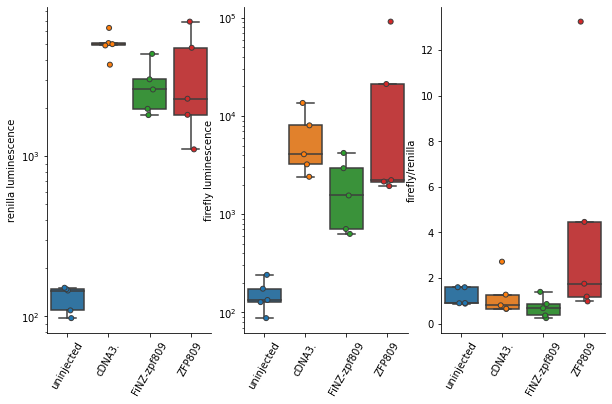

RanksumsResult(statistic=-0.731126155013931, pvalue=0.46470209994046485)
RanksumsResult(statistic=2.1933784650417927, pvalue=0.028280122568276955)


In [44]:
fig, axes = plt.subplots(figsize=(10, 6), ncols=3)

for i, ycond in enumerate(['renilla luminescence', 'firefly luminescence']):
    sns.boxplot(data=df, x='condition', y=ycond, fliersize=0, ax=axes[i])
    sns.stripplot(data=df, x='condition', y=ycond, linewidth=1, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 60, ha='center')
    axes[i].set_yscale('log')
    axes[i].set_xlabel('')
    
sns.boxplot(data=df, x='condition', y='firefly/renilla', fliersize=0, ax=axes[2], notch=False)
sns.stripplot(data=df, x='condition', y='firefly/renilla', linewidth=1, ax=axes[2])    
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation = 60, ha='center')
axes[2].set_xlabel('')
        
sns.despine()
plt.show()

print(stats.ranksums(df.loc[df.condition == 'FiNZ-zpf809', 'firefly/renilla'],
                     df.loc[df.condition == 'cDNA3.', 'firefly/renilla']))
print(stats.ranksums(df.loc[df.condition == 'ZFP809', 'firefly/renilla'],
                     df.loc[df.condition == 'FiNZ-zpf809', 'firefly/renilla']))
# print(stats.ttest_ind(df.loc[df.condition == 'ZFP809', 'firefly/renilla'],
#                      df.loc[df.condition == 'cDNA3.', 'firefly/renilla']))

In [38]:
df2 = df.copy()
bg_firefly = df.loc[df.condition == 'uninjected', 'firefly luminescence'].median()
bg_renilla = df.loc[df.condition == 'uninjected', 'renilla luminescence'].median()
df2['fl_bs'] = df2['firefly luminescence'] - bg_firefly
df2['rl_bs'] = df2['renilla luminescence'] - bg_renilla
# df2 = df2[['condition', 'rl_bs', 'fl_bs']].groupby('condition').mean().reset_index()
df2['norm_rl'] = df2.rl_bs/df2.rl_bs
df2['norm_fl'] = df2.fl_bs/df2.rl_bs
# df2['norm_rl'] = df2[['condition', 'rl_bs']].div(df2.groupby('condition').transform('mean'))['rl_bs']
# df2['norm_rl'] = df2[['condition', 'rl_bs']].div(df2.groupby('condition').transform('mean'))['rl_bs']
# df2['norm_rl'] = df2['rl_bs']/df2['mean_rl']
# df2['firefly/renilla'] = df2['firefly luminescence']/df2['renilla luminescence']
# df2 = df2.loc[df2.condition != 'uninjected']
print(df2)

   well    condition  firefly luminescence  renilla luminescence  \
0    G1   uninjected                 87.28                 97.55   
1    G2   uninjected                127.10                145.00   
2    G3   uninjected                133.50                147.90   
3    G4   uninjected                240.80                150.90   
4    G5   uninjected                174.00                109.00   
5    G6       cDNA3.               4079.00               5080.00   
6    G7       cDNA3.               2404.00               3724.00   
7    G8       cDNA3.               8032.00               6316.00   
8    G9       cDNA3.               3219.00               4909.00   
9   G10       cDNA3.              13590.00               5003.00   
10  G11  FiNZ-zpf809               1551.00               1805.00   
11  G12  FiNZ-zpf809                629.20               2608.00   
12   H1  FiNZ-zpf809               4205.00               3017.00   
13   H2  FiNZ-zpf809               2940.00      

<AxesSubplot:xlabel='condition', ylabel='norm_fl'>

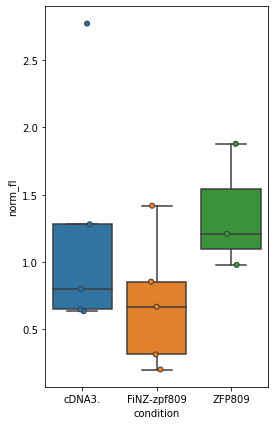

In [39]:
fig, ax = plt.subplots(figsize=(4, 7))
sns.boxplot(data=df2.loc[df2.condition != 'uninjected'], 
            x='condition', 
            y='norm_fl', 
            fliersize=0,
            ax=ax)
sns.stripplot(data=df2.loc[df2.condition != 'uninjected'], x='condition', y='norm_fl', ax=ax, linewidth=1)


In [41]:
promoter_control_df = pd.read_csv('../data/luciferase_assay_pGL3promoter_4_15_22.csv')
promoter_control_df['replicate'] = promoter_control_df['condition'].apply(lambda x: x.split(' ')[-1].strip('rep'))
promoter_control_df['condition'] = promoter_control_df['condition'].apply(lambda x: x.split(',')[0].strip())
for i in range(1, 6):
    promoter_control_df['condition'] = promoter_control_df['condition'].apply(lambda x: x.strip(f'rep{i}').strip())
print(promoter_control_df)

   well    condition  firefly luminescence  renilla luminescence  \
0    F1   uninjected                153.40                 177.9   
1    F2   uninjected                118.90                 301.8   
2    F3   uninjected                143.30                 262.3   
3    F4   uninjected                 95.08                 184.9   
4    F5   uninjected                 97.58                 270.6   
5    F6       cDNA3.               2973.00               65260.0   
6    F7       cDNA3.               2330.00               43920.0   
7    F8       cDNA3.               7934.00               62310.0   
8    F9       cDNA3.              11400.00               84970.0   
9   F10       cDNA3.               1717.00               58460.0   
10  F11  FiNZ-zpf809               1736.00               46310.0   
11  F12  FiNZ-zpf809               3143.00               36560.0   
12   G1  FiNZ-zpf809               5397.00               15630.0   
13   G2  FiNZ-zpf809               6201.00      

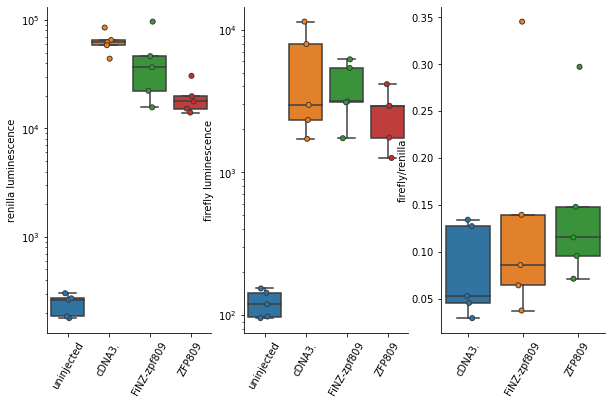

In [42]:
fig, axes = plt.subplots(figsize=(10, 6), ncols=3)

for i, ycond in enumerate(['renilla luminescence', 'firefly luminescence']):
    sns.boxplot(data=promoter_control_df, x='condition', y=ycond, fliersize=0, ax=axes[i])
    sns.stripplot(data=promoter_control_df, x='condition', y=ycond, linewidth=1, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 60, ha='center')
    axes[i].set_yscale('log')
    axes[i].set_xlabel('')
sns.boxplot(data=promoter_control_df.loc[promoter_control_df.condition != 'uninjected'], x='condition', y='firefly/renilla', fliersize=0, ax=axes[2])
sns.stripplot(data=promoter_control_df.loc[promoter_control_df.condition != 'uninjected'], x='condition', y='firefly/renilla', linewidth=1, ax=axes[2])    
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation = 60, ha='center')
axes[2].set_xlabel('')
        
sns.despine()
plt.show()
